## Лабораторная работа 2
### Визуализация данных
### Выполнил: 6131-010402D, Макаров Андрей Романович

## Описание данных:
### Этот набор данных был создан, чтобы перечислить всех операторов, за которых можно играть в мобильной игре Arknights, и проанализировать данные, чтобы найти интересные факты.
## Содержание:
### Этот набор данных содержит 235 различных операторов с более чем 60 строками статистики каждого оператора. Большинство столбцов представляют собой характеристики (HP, ATK, DEF, RES, REDEPLOY, DP_COST, BLOCK, INTERVAL) на каждом уровне классификации (BASE, ELITE 1, ELITE 2, MAX).


In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [8]:
df = pd.read_csv('/home/anma/Рабочий стол/Files/study/Vika/datasets/data_2lab.csv', sep = ',')

In [9]:
df

,name,class,branch,faction,stars,position,tags,trait,availability,icon,...,images,experience,place_of_birth,date_of_birth,race,infection_status,strength,tactical_acumen,combat_skill,arts_adaptability
0,Castle-3,Guard,Dreadnought,Rhodes Island,1-star,Melee,"['Support', 'Robot']",Blocks 1 enemy and ignores the Deployment Limi...,Recruitment,https://static.wikia.nocookie.net/mrfz/images/...,...,{'Base': 'https://static.wikia.nocookie.net/mr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""Justice Knight""",Sniper,Marksman,Pinus Sylvestris,1-star,Ranged,"['Support', 'Robot']",Attacks aerial enemies first and ignores the D...,Recruitment,https://static.wikia.nocookie.net/mrfz/images/...,...,"{'""Justice Knight""': 'https://static.wikia.noc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lancet-2,Medic,Medic,Rhodes Island,1-star,Ranged,"['Healing', 'Robot']",Restores the HP of allies and ignores the Depl...,Recruitment; TR-10,https://static.wikia.nocookie.net/mrfz/images/...,...,{'Default': 'https://static.wikia.nocookie.net...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,THRM-EX,Specialist,Executor,Rhodes Island,1-star,Melee,"['Nuker', 'Robot']",Does not attack and ignores the Deployment Lim...,Recruitment; 7-2,https://static.wikia.nocookie.net/mrfz/images/...,...,{'THRM-EX': 'https://static.wikia.nocookie.net...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12F,Caster,Splash,Rhodes Island,2-star,Ranged,['Starter'],Deals AOE Arts Damage,Recruitment; TR-6,https://static.wikia.nocookie.net/mrfz/images/...,...,{'12F': 'https://static.wikia.nocookie.net/mrf...,5 years,Unknown,March 3rd,Savra,Non-infected as confirmed by medical report.,Normal,Normal,Normal,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Surtr,Guard,Arts Fighter,Rhodes Island,6-star,Melee,['DPS'],Deals Arts Damage,Headhunting,https://static.wikia.nocookie.net/mrfz/images/...,...,{'Base': 'https://static.wikia.nocookie.net/mr...,2 years,Unknown,January 22nd,Sarkaz,Confirmed Infected by medical examination.,Normal,Excellent,Normal,Flawed
231,Suzuran,Supporter,Decel Binder,Siracusa,6-star,Ranged,"['Slow', 'Support', 'DPS']",Deals Arts Damage and Slows the target for a s...,Headhunting,https://static.wikia.nocookie.net/mrfz/images/...,...,{'Base': 'https://static.wikia.nocookie.net/mr...,None,Far East,October 9th,Vulpo,Confirmed Infected by medical examination.,Normal,Standard,Standard,Excellent
232,Thorns,Guard,Lord,Iberia,6-star,Melee,"['DPS', 'Defense']",Can launch Ranged Attacks that deal 80% of nor...,Headhunting,https://static.wikia.nocookie.net/mrfz/images/...,...,{'Base': 'https://static.wikia.nocookie.net/mr...,5 years,Iberia,March 17th,Aegir,Medical tests have confirmed that no infection...,Excellent,Standard,Excellent,Standard
233,W,Sniper,Artilleryman,Babel,6-star,Ranged,"['AoE', 'DPS', 'Crowd-Control']",Deals AOE Physical Damage,Headhunting (Celebration limited),https://static.wikia.nocookie.net/mrfz/images/...,...,{'Base': 'https://static.wikia.nocookie.net/mr...,11 years,Kazdel‏‎,Claims to have forgotten.,Sarkaz,Confirmed Infected by medical examination.,Standard,Outstanding,Excellent,Standard


In [15]:
df.columns


Index(['base_atk', 'base_hp', 'base_def', 'elite_1_atk', 'elite_1_def',
       'base_block', 'elite_1_block'],
      dtype='object')

In [11]:
# в копии датасета оставляем точно числовые столбцы
df = df[['base_atk','base_hp','base_def','elite_1_atk','elite_1_def','base_block','elite_1_block']].copy()

### 1.1. Построить любой график (любого рода) с помощью чистого matplotlib / pylab

In [12]:
# Зависимость 
X = np.transpose([df['base_def'].values, df['base_atk'].values])

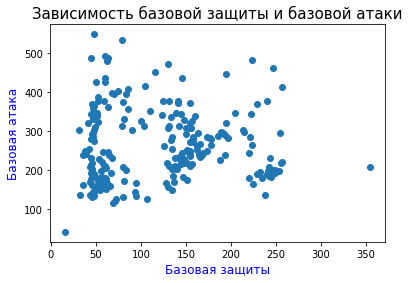

In [13]:
# заголовок
plt.title('Зависимость базовой защиты и базовой атаки', fontsize=15)

plt.xlabel('Базовая защиты', fontsize=12, color='blue')
plt.ylabel('Базовая атака', fontsize=12, color='blue')

# точечный график
plt.scatter(X[:,0], X[:,1])

##### 1.2. Построить несколько суб-графиков на одном графике используя .subplot

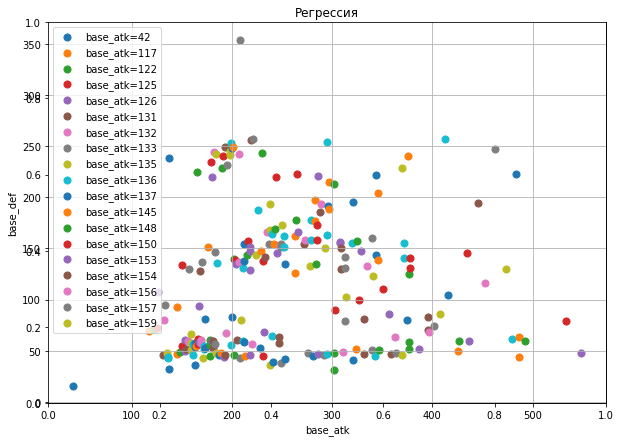

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))  
ax = plt.axes()        
legend = []
plt.title('Регрессия')
x_lable='base_atk'
y_lable='base_def'
ax.set_xlabel(x_lable)             
ax.set_ylabel(y_lable)  
for c, rows in df.groupby('base_atk'):
    plt.scatter(rows[x_lable], rows[y_lable], s = 50)
    legend.append("base_atk=%s" % c)
plt.legend(legend[0:19], loc="upper left")
plt.grid()
plt.show()

(array([42., 66., 12., 44., 29., 12., 24.,  5.,  0.,  1.]),
 array([ 16. ,  49.8,  83.6, 117.4, 151.2, 185. , 218.8, 252.6, 286.4,
        320.2, 354. ]),
 <BarContainer object of 10 artists>)

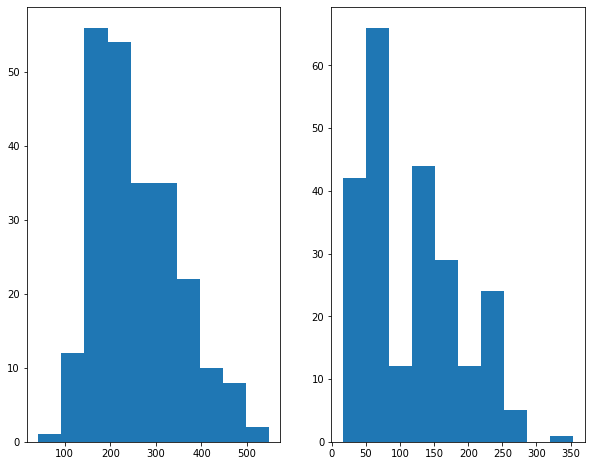

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.hist(df['base_atk'])
ax2.hist(df['base_def'])


#### 2 Построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot 

Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). 

Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

In [22]:
df.head(8)

,base_atk,base_hp,base_def,elite_1_atk,elite_1_def,base_block,elite_1_block
0,247,928,63,353,90,1,1
1,137,396,32,172,41,1,1
2,42,261,16,70,27,1,1
3,208,1154,354,260,443,0,0
4,302,1461,31,432,50,1,1
5,238,571,36,340,62,1,1
6,180,1219,220,240,315,3,3
7,161,546,46,269,66,1,1


<AxesSubplot:>

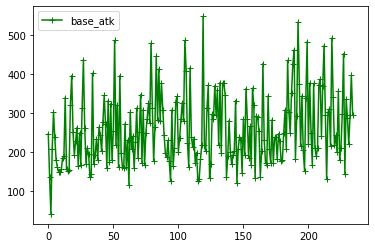

In [23]:
# Захотел зеленый график с плюсиками
df.plot(y = "base_atk", color='green', marker='+')

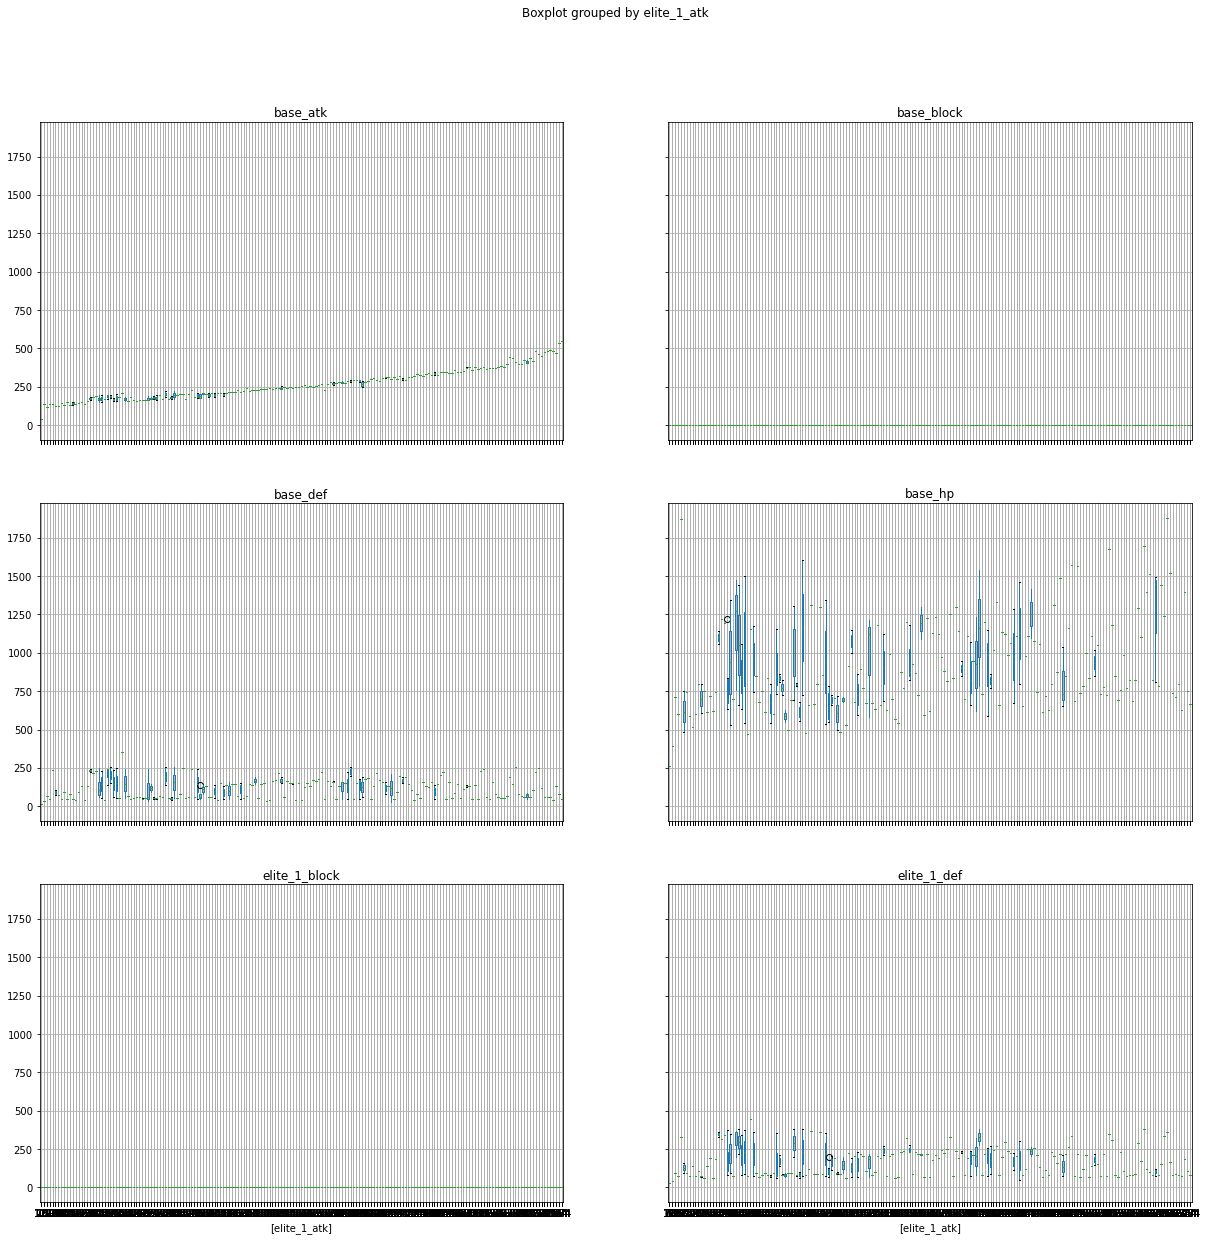

In [24]:
boxplot = df.boxplot(by= 'elite_1_atk', figsize=(20,20))

<AxesSubplot:ylabel='Density'>

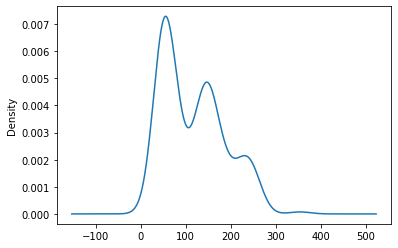

In [25]:
df['base_def'].plot.kde(y='base_def')

<AxesSubplot:ylabel='Density'>

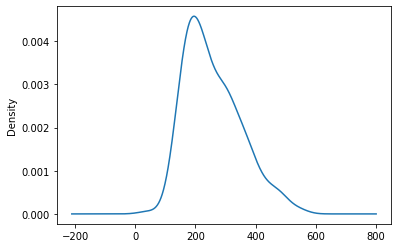

In [27]:
df['base_atk'].plot.kde(y='base_atk')

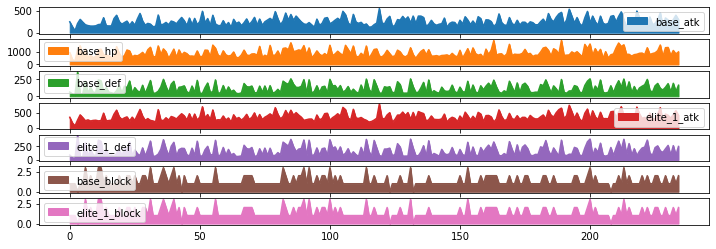

In [28]:
axs = df.plot.area(figsize=(12, 4), subplots=True)

<AxesSubplot:>

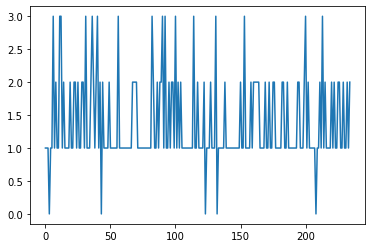

In [29]:
df['elite_1_block'].plot()

<AxesSubplot:>

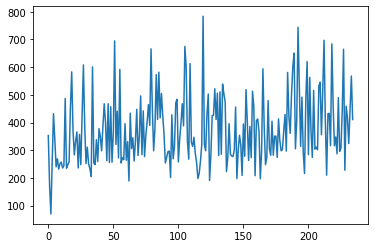

In [30]:
df['elite_1_atk'].plot()

In [34]:
# Работа с объектами Series
e1_atk = df['elite_1_atk']
type(e1_atk)

pandas.core.series.Series

<AxesSubplot:ylabel='Frequency'>

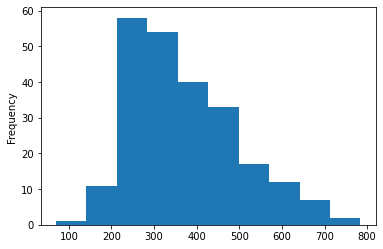

In [39]:
e1_atk.plot(kind = 'hist')

#### 3 Seaborn 
##### 3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

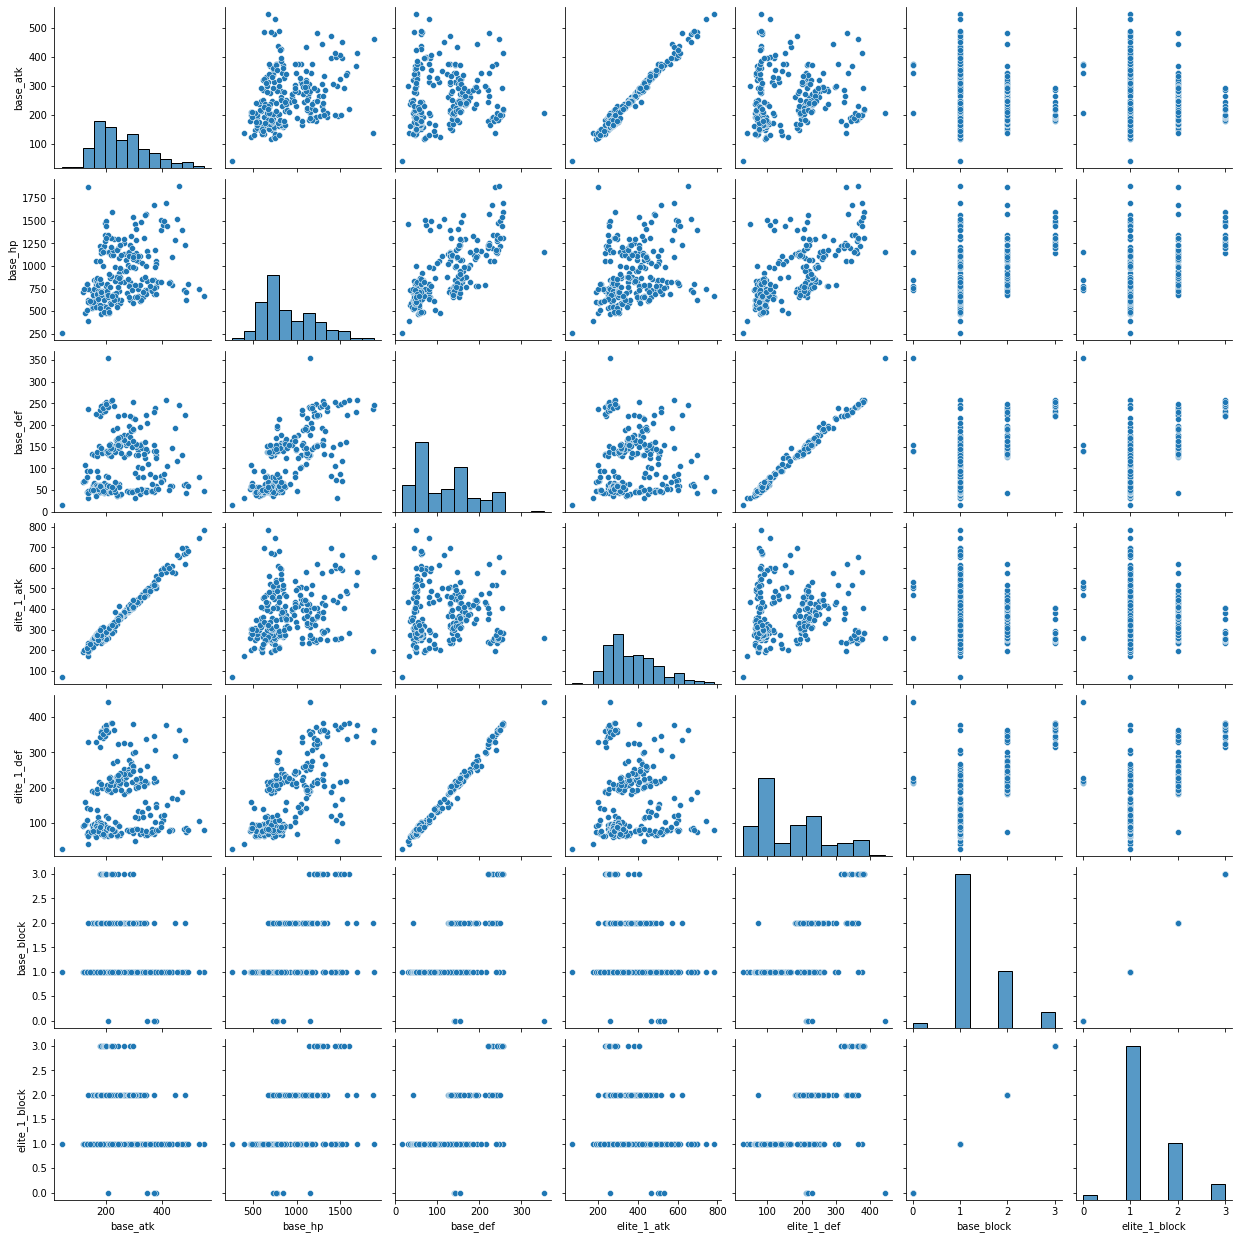

In [41]:
sns.pairplot(df)

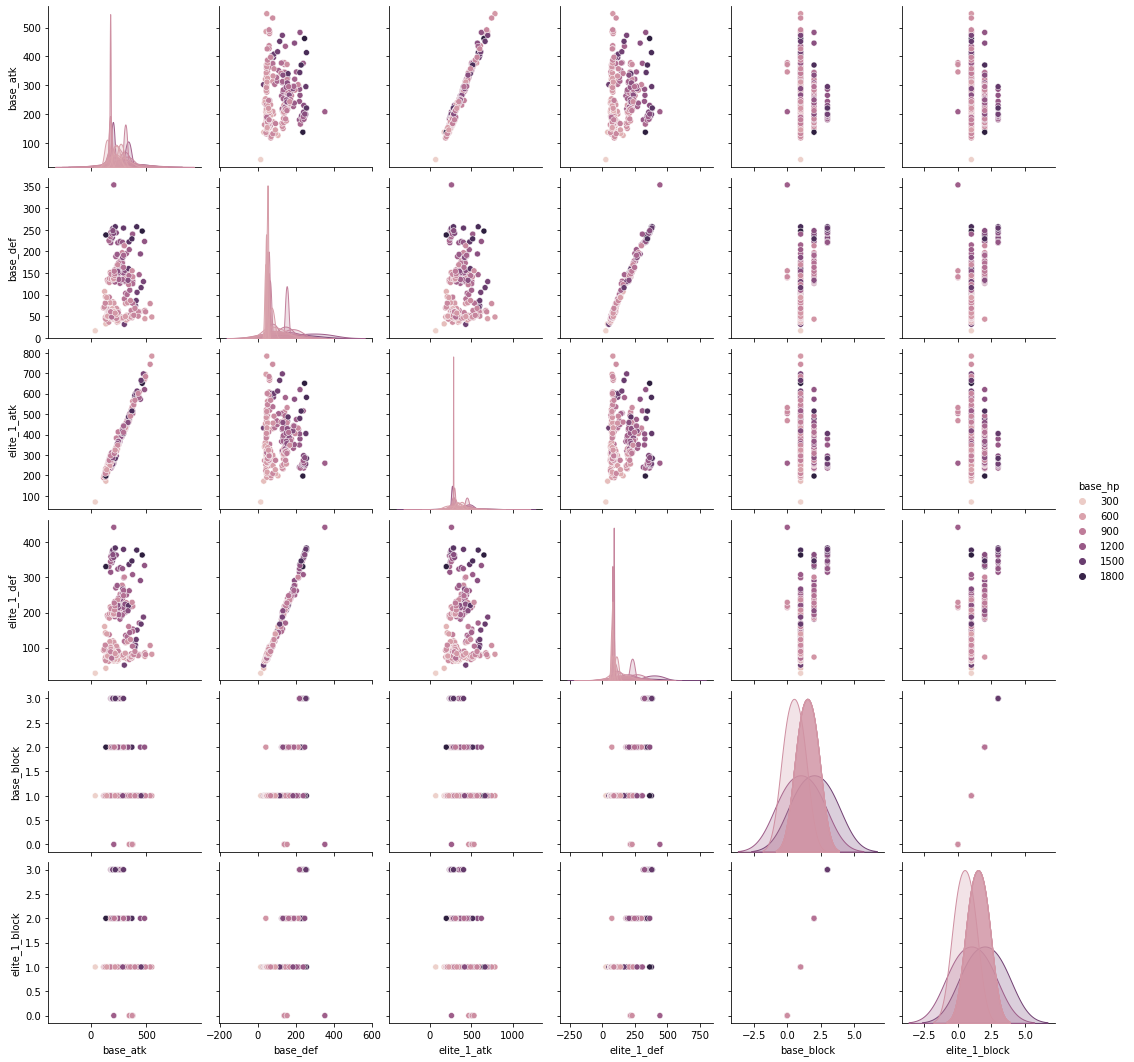

In [44]:
sns.pairplot(df, hue='base_hp')

<AxesSubplot:xlabel='elite_1_atk', ylabel='count'>

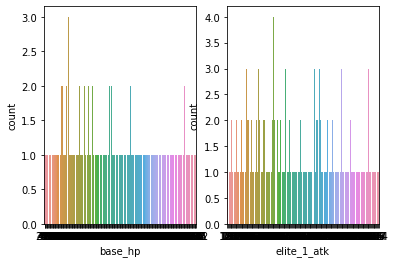

In [49]:
plt.subplot(1,2,1)
sns.countplot(x = "base_hp", data = df)

plt.subplot(1,2,2)
sns.countplot(x = "elite_1_atk", data = df)

<AxesSubplot:xlabel='base_hp', ylabel='elite_1_atk'>

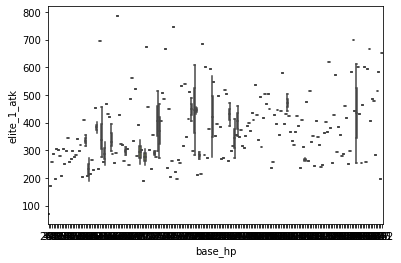

In [50]:
sns.boxplot(x="base_hp", y="elite_1_atk", data=df)

<AxesSubplot:xlabel='base_hp', ylabel='elite_1_atk'>

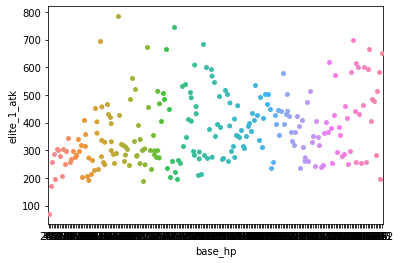

In [51]:
sns.stripplot(x="base_hp", y="elite_1_atk", data=df)

##### 3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

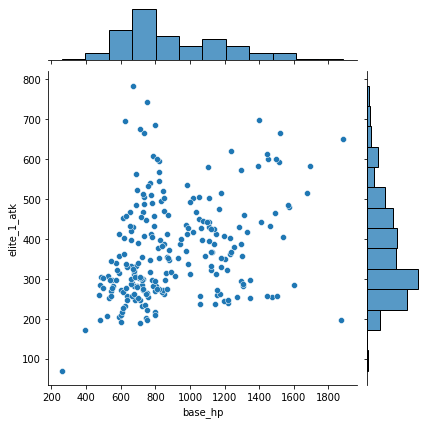

In [52]:
sns.jointplot(x='base_hp', y='elite_1_atk', data=df)

##### 3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

<AxesSubplot:xlabel='base_hp', ylabel='elite_1_atk'>

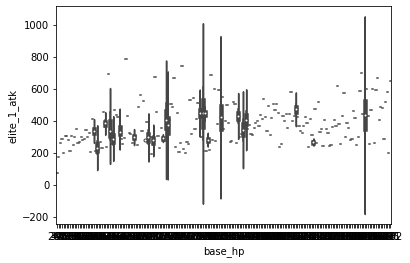

In [53]:
sns.violinplot(x='base_hp', y='elite_1_atk', data=df)

##### 3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)

<AxesSubplot:>

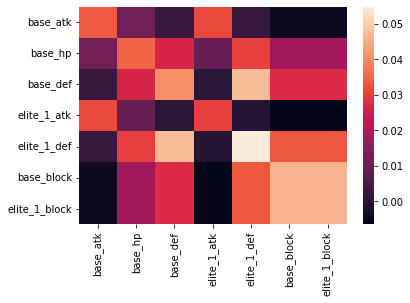

In [54]:
sns.heatmap(df.apply(lambda x: ((x - x.min())/(x.max() - x.min())), axis=0).cov())

#### 4 Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

In [56]:
from scipy.stats import probplot

((array([-2.75381899, -2.44971474, -2.27686342, -2.15334183, -2.05593   ,
         -1.97483652, -1.90496867, -1.84332493, -1.7879813 , -1.73762754,
         -1.69132942, -1.64839645, -1.60830323, -1.57064029, -1.53508209,
         -1.50136529, -1.46927378, -1.43862787, -1.4092765 , -1.38109138,
         -1.35396261, -1.32779528, -1.30250683, -1.27802496, -1.25428601,
         -1.2312336 , -1.20881755, -1.18699299, -1.16571961, -1.14496111,
         -1.12468461, -1.10486025, -1.08546087, -1.0664616 , -1.0478397 ,
         -1.02957425, -1.01164599, -0.99403714, -0.97673123, -0.95971302,
         -0.94296832, -0.92648392, -0.91024752, -0.8942476 , -0.8784734 ,
         -0.86291481, -0.84756235, -0.83240711, -0.81744069, -0.80265517,
         -0.78804308, -0.77359733, -0.75931125, -0.74517848, -0.73119301,
         -0.71734911, -0.70364135, -0.69006456, -0.67661378, -0.66328433,
         -0.6500717 , -0.63697159, -0.62397989, -0.61109267, -0.59830615,
         -0.58561672, -0.57302089, -0.

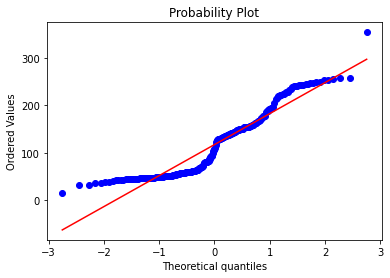

In [57]:
probplot(df['base_def'], dist="norm", plot=plt)

In [65]:
df2 = df.sort_values(by = "base_hp")

In [66]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df2['base_hp'], y = df2['base_def']))
fig.show()

In [73]:
df.iloc[0:, 1:-3 ]

,base_hp,base_def,elite_1_atk
0,928,63,353
1,396,32,172
2,261,16,70
3,1154,354,260
4,1461,31,432
...,...,...,...
230,1330,186,418
231,673,57,324
232,1096,191,442
233,821,68,568


In [74]:
px.scatter(df.iloc[0:, 1:-2 ])

In [75]:
px.line(df.iloc[0:, 1:-2 ])

In [76]:

px.bar(df.iloc[0:, 1:-2 ])